### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [110]:
%matplotlib inline

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1. Import the necessary packages - 2.5 marks

In [111]:
data=pd.read_csv("D:/FTP Folder/Data.csv")
item=pd.read_csv("D:/FTP Folder/item.csv")
user=pd.read_csv("D:/FTP Folder/user.csv")

data.head()
item.head()
user.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [112]:
data.shape
data.info()
data.describe()
data.isnull().sum()

item.shape
item.info()
item.describe()
item.isnull().sum()

user.shape
user.info()
user.describe()
user.isnull().sum()

(100000, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

(1681, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

(943, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

##### Observation: There is no any Null values in any of date sets out of three.

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [113]:
item.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

##### Observation: "Drama" is the highest released movie type 

#### 4. Find the number of movies per genre using the item data - 5 marks

In [114]:
item.loc[item.iloc[:, 3:].sum(axis=1)>1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


##### Observation: 849 Movies are having  more than one genre

#### 5. Find the movies that have more than one genre - 2.5 marks

In [115]:
item=item.drop(item[item.unknown == 1].index)
item.sum()


movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

##### Observation: Previously there was one Movie in Unknown catogory and above has zero Unknown after drop

#### 6. Drop the movie where the genre is unknown - 2.5 marks

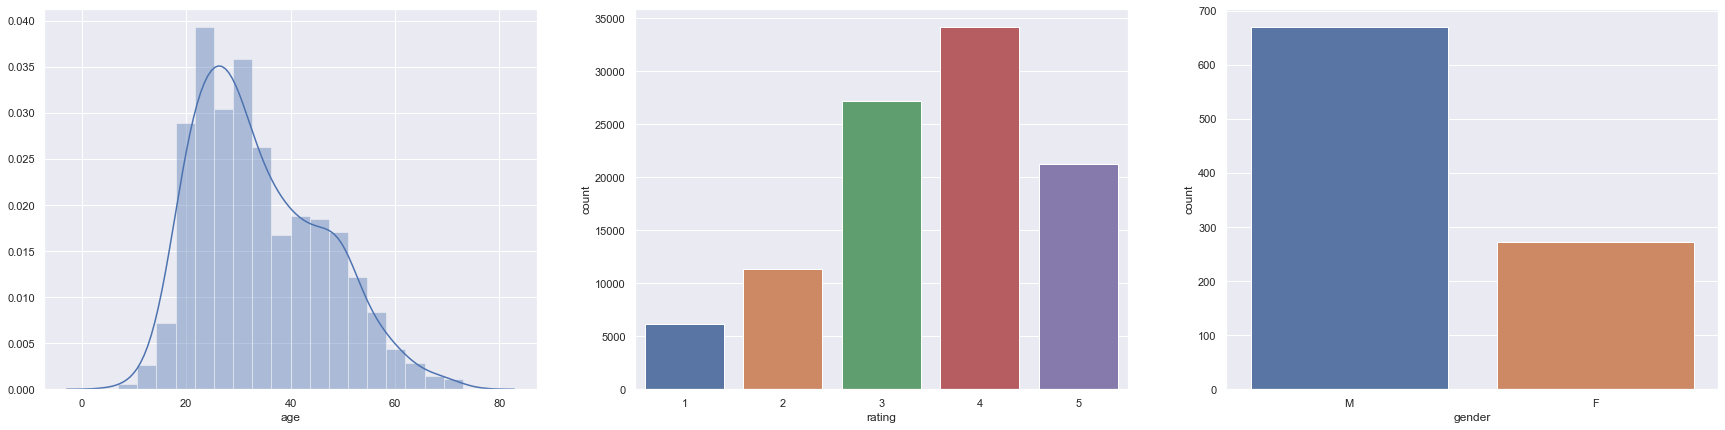

In [116]:

fig, axs = plt.subplots(ncols = 3, figsize = (30, 7))
sns.distplot(user['age'],ax=axs[0]);
sns.countplot(data['rating'],ax=axs[1]);
sns.countplot(user['gender'],ax=axs[2]);

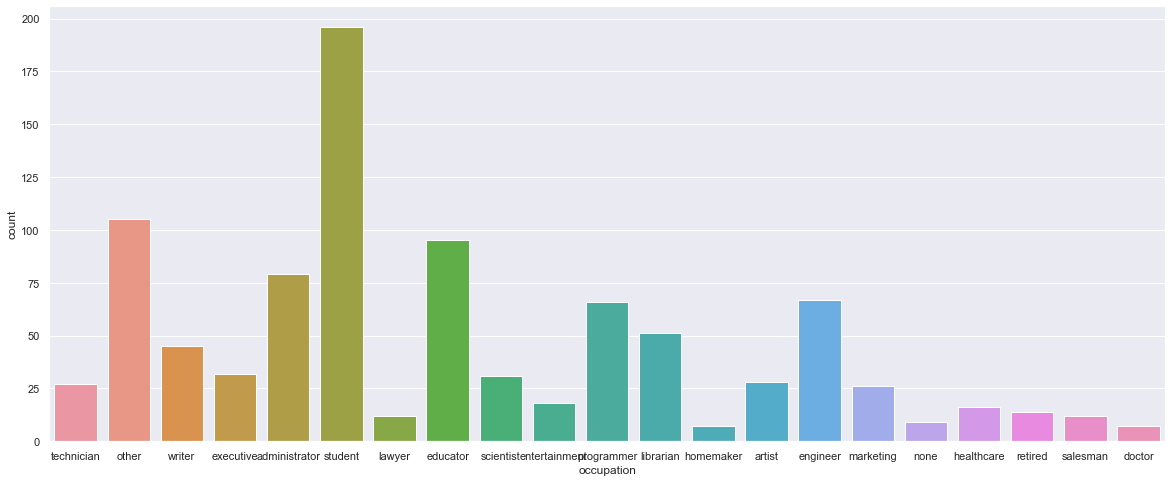

In [117]:
plt.figure(figsize=(20,8))
sns.countplot(user['occupation']);

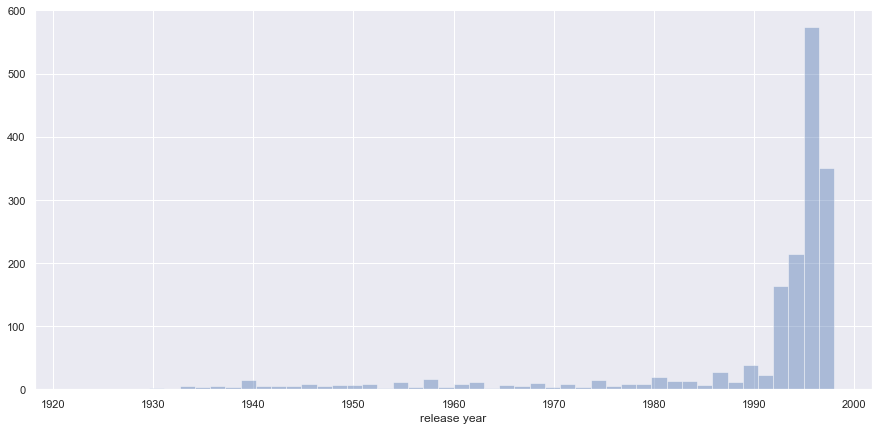

In [118]:
item=item.rename({'release date': 'release_date'}, axis=1)
item['release year'] = item.apply(lambda row: row.release_date.split('-')[2],axis = 1)
plt.figure(figsize=(15,7))
sns.distplot(item['release year'],kde=False);

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

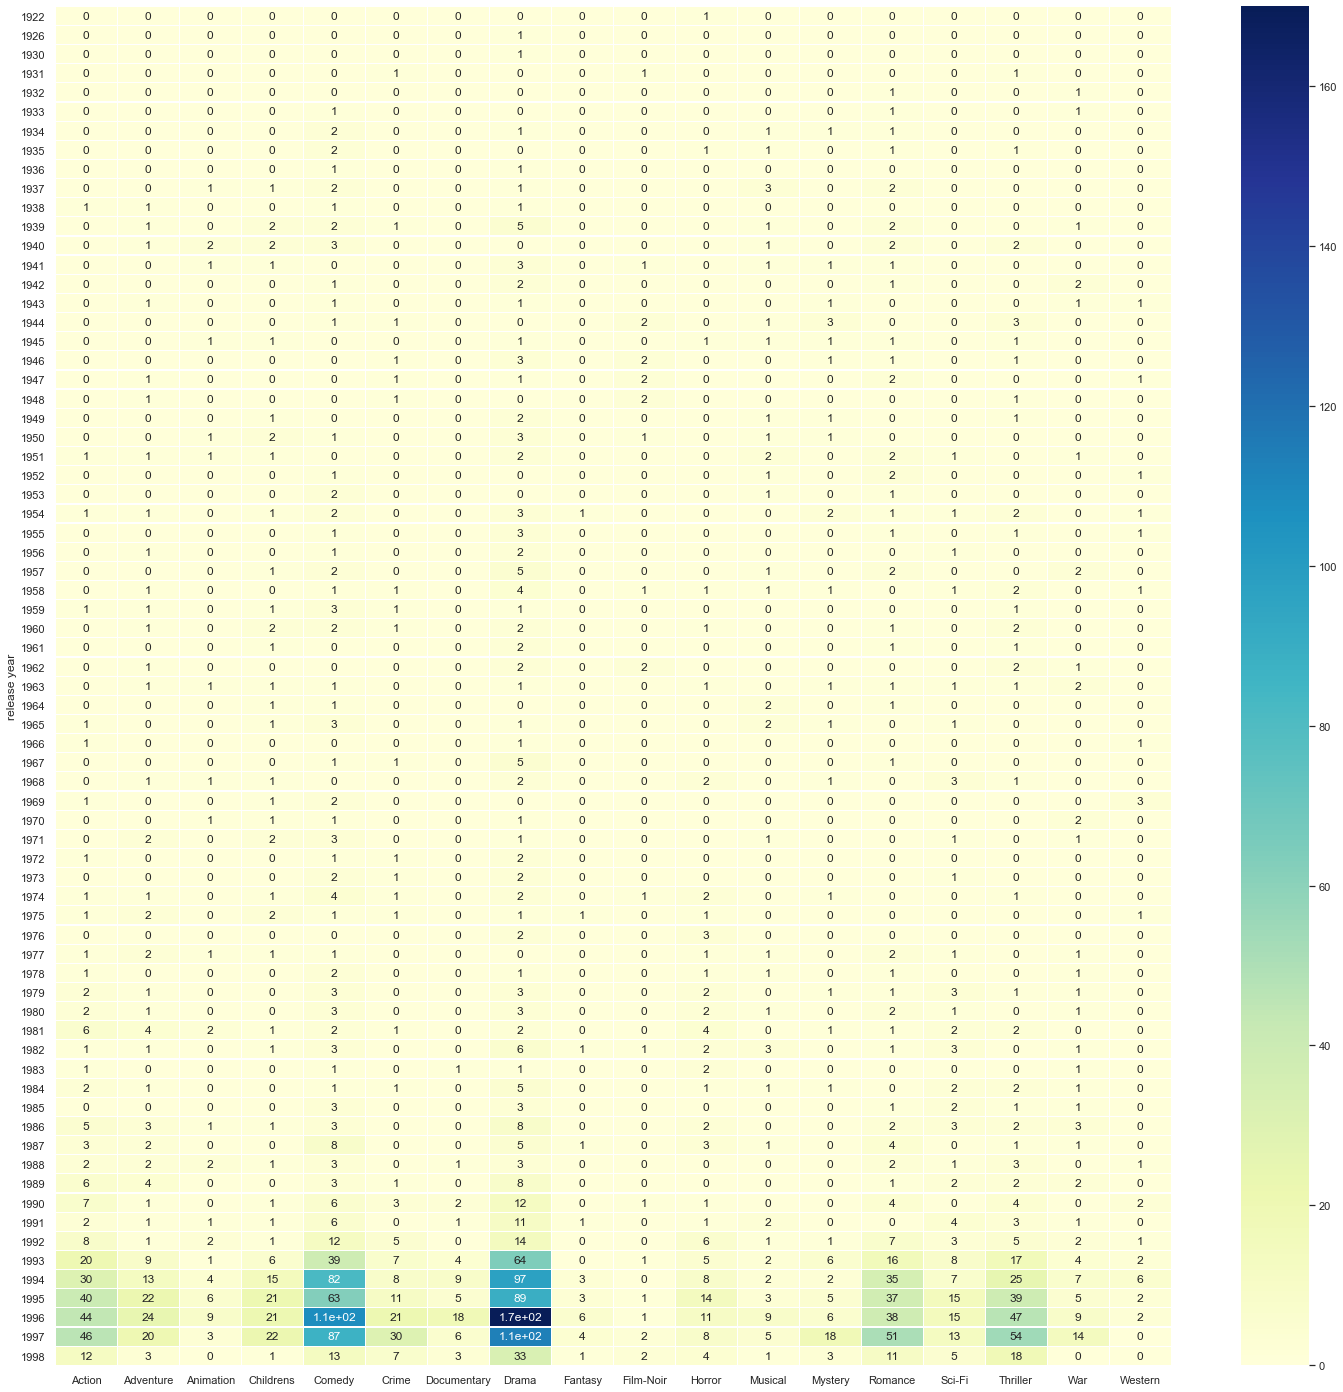

In [121]:
item_new=item.drop(item.columns[[0,1,2,3]], axis=1)
plt.figure(figsize=(25,25))
sns.heatmap(item_new.groupby(['release year']).sum(),cmap="YlGnBu",linewidths=.2,annot=True);


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

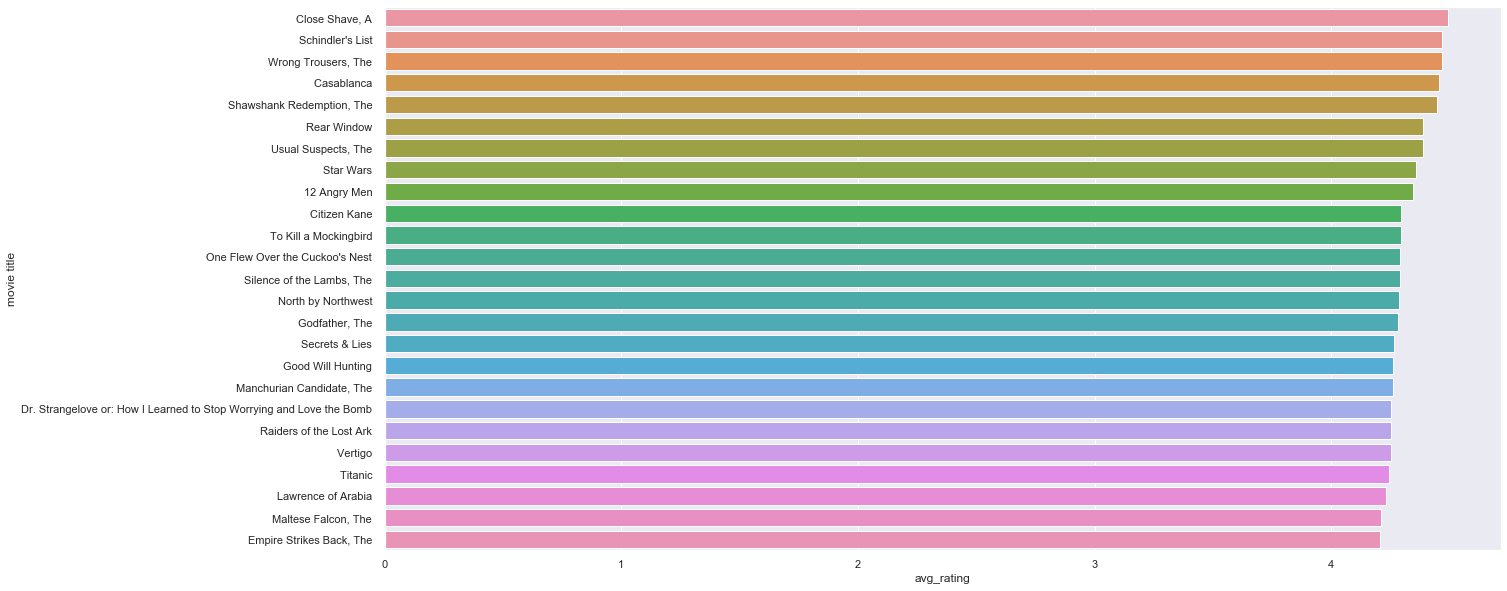

In [122]:
data_Modified=pd.merge(data.groupby(['movie id']).count(),data.groupby(['movie id']).sum(),on='movie id', how='inner')
data_Modified=data_Modified.drop(data_Modified.columns[[0,2,3,5]], axis=1)
data_Modified=data_Modified.rename({'rating_x': 'rating_count','rating_y': 'rating_sum'}, axis=1)
data_Modified=data_Modified[(data_Modified.rating_count > 100)]
item_merge = pd.merge(item, data_Modified, on='movie id', how='inner')
item_merge=item_merge.sort_values(by=['rating_count'],ascending=False)
item_merge['avg_rating'] = item_merge.apply(lambda row: (row.rating_sum/row.rating_count),axis = 1)
item_merge=item_merge.sort_values(by=['avg_rating'],ascending=False).head(25)
plt.figure(figsize=(20,10))
sns.barplot(data=item_merge,y='movie title',x='avg_rating');


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [56]:
df_temp=pd.merge(user,data,on='user id', how='inner' )
data_user=df_temp.groupby(['movie id','gender']).sum()
data_user=data_user.drop(data_user.columns[[0,1,3]], axis=1)
data_user=data_user.unstack()
data_user.head()

In [17]:
item.head()

,movie id,movie title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [75]:
item_user_data=pd.merge(item,data_user,on='movie id', how='inner' )

In [76]:
item_user_data.head()

,movie id,movie title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,"(rating, F)","(rating, M)"
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1995,451.0,1302.0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1995,64.0,356.0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,43.0,230.0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1995,153.0,589.0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1995,83.0,201.0


In [98]:
Drama = item_user_data.iloc[: , [11, 23, 24]].copy()
Drama.head()

,Drama,"(rating, F)","(rating, M)"
0,0,451.0,1302.0
1,0,64.0,356.0
2,0,43.0,230.0
3,1,153.0,589.0
4,1,83.0,201.0


In [123]:
Drama_piv=Drama.pivot(columns='Drama').sum().unstack()
Drama_piv['%']=(Drama_piv[1]/Drama_piv.sum().sum())*100

In [91]:
Drama_piv


Drama,0,1,%
"(rating, F)",50580.0,40314.0,11.421885
"(rating, M)",155266.0,106794.0,30.257201


In [124]:
Sci_Fi=item_user_data.iloc[: , [18, 23, 24]].copy()
Sci_Fi_piv=Sci_Fi.pivot(columns='Sci-Fi').sum().unstack()
Sci_Fi_piv['%']=(Sci_Fi_piv[1]/Sci_Fi_piv.sum().sum())*100
Sci_Fi_piv

Sci-Fi,0,1,%
"(rating, F)",81698.0,9196.0,2.605439
"(rating, M)",225928.0,36132.0,10.237028


In [125]:
Romance=item_user_data.iloc[: , [17, 23, 24]].copy()
Romance_piv=Romance.pivot(columns='Romance').sum().unstack()
Romance_piv['%']=(Romance_piv[1]/Romance_piv.sum().sum())*100
Romance_piv

Romance,0,1,%
"(rating, F)",69479.0,21415.0,6.067363
"(rating, M)",212993.0,49067.0,13.901812


#### Conclusion:
##### Men watch more drama than women
##### Men watch more Sci-Fi than women
##### Men Watch more Romance than women
